# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Introduction
### Project Description:
We received data from the website for free advertisements of vehicles. Our goal is to study the data and make conclusion about which factors influence the price of a vehicle.

### Project stages:
1. Opening the data file and study the information about data
2. Data preprocessing, working with missing values and data types
3. Calculating all metrics we need for analyse.
4. Carrying out the Exploratory Data Analysis
5. Overall conclusion

### Dataset Description:
The dataset contains the following fields:
 -  price
 -  model_year
 -  model
 -  condition
 -  cylinders
 -  fuel — gas, diesel, etc.
 -  odometer — the vehicle's mileage when the ad was published
 -  transmission
 -  paint_color
 -  is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
 -  date_posted — the date the ad was published
 -  days_listed — from publication to removal

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
try:
    data = pd.read_csv('/Users/yoheved/Desktop/Study/vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [3]:
data.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusion

We have the dataset with 51525 rows and 13 columns. The types of data are: float64 - 4 columns, int64 - 2 columns and objext - 7 columns. From the info I see missing values in columns model_year, cylinders, odometr, paint_color and the most in columns is_4wd. Need to look closer and understand why we may have missing values there and what the best we can do with them. Also I see the it will be better to convert column model_year to the int64 type, since float is not looking good for the table. And I can work with date_posted to bring it to the better view.

## Data preprocessing

### To do list
— Identify and study missing values:
In some cases there's an obvious way to replace missing values. For instance, if a Boolean field contains only True values, it's reasonable to assume that the missing values are False. There aren't such obvious fixes for other data types, and there are cases when the fact that a value is missing is significant. In such instances, don't fill in the values.
When appropriate, do fill in the values. Explain why you chose to do so and how you selected the replacement values.
Describe the factors that may have resulted in missing values.
— Convert the data to the required types:
Indicate the columns where the data types need to be changed and explain why.

In [6]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
data.isna().sum() * 100 / len(data)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [8]:
data['model_year'] = data['model_year'].fillna(data['model_year'].median().astype('int'))

In [9]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [10]:
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].median())

In [11]:
data['cylinders'] = data['cylinders'].astype('int')

In [12]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [13]:
data['paint_color'] = data['paint_color'].fillna('other')

In [14]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,other,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [15]:
data['odometer'] = data['odometer'].fillna(data['odometer'].median())

In [16]:
data['odometer'] = data['odometer'].astype('int')

In [17]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,other,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,113000,automatic,pickup,other,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,NaN,2019-04-02,28


In [18]:
data['is_4wd'] = data['is_4wd'].fillna(0.0)

In [19]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,other,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,113000,automatic,pickup,other,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28


In [20]:
data['is_4wd'] = data['is_4wd'].astype('bool')

In [21]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,113000,automatic,pickup,other,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [22]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8,gas,113000,automatic,pickup,other,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null int64
fuel            51525 non-null object
odometer        51525 non-null int64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


### Conclusion
After looking at the data, I saw 5 coulmns with missing values, first 3: model_year, cylinders and odometer had 5%-15% of missing values, so I decided to replace them on median and convert into int type, because there weren't a lot of them. In the column paint_color were a little bit more missing values. But the most of customers first choose car according its technical characteristics, so I decided to replace missing values with 'other' color, it will not damage results of our calculations. In the column 'is_4wd' were around of 50% of missing values, but upon looking at the data I saw that all values we have is 1, so obviously missing values is 0, since it just information about is this particular car is 4_wd or not. I replaced missing values with 0 and converted data type to boolean, so now we see the hole picture clear and understandable. And the last thing I did to prepare my data is convertation the date in column 'date_posted', so now we have the correct data type and memory usage reduced.

## Make calculations and add them to the table

### To do list:
 -  Day of the week, month, and year the ad was placed
 -  The vehicle's age (in years) when the ad was placed
 -  The vehicle's average mileage per year
 -  In the condition column, replace string values with a numeric scale:
new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0

In [25]:
data['week'] = pd.DatetimeIndex(data['date_posted']).week
data['month'] = pd.DatetimeIndex(data['date_posted']).month
data['year'] = pd.DatetimeIndex(data['date_posted']).year

In [26]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week,month,year
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,25,6,2018
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,42,10,2018
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,2,2019
3,1500,2003.0,ford f-150,fair,8,gas,113000,automatic,pickup,other,False,2019-03-22,9,12,3,2019
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14,4,2019


In [27]:
data['age'] = data['year'] - data['model_year']

In [28]:
def calc_mileage(row):
    if row['age'] == 0:
        return row['odometer']
    else:
        return row['odometer'] / row['age']

In [29]:
data['mileage_per_year'] = data.apply(calc_mileage, axis=1)

In [30]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week,month,year,age,mileage_per_year
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,25,6,2018,7.0,20714.285714
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,42,10,2018,7.0,12672.142857
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8,gas,113000,automatic,pickup,other,False,2019-03-22,9,12,3,2019,16.0,7062.500000
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14,4,2019,2.0,40451.500000


In [31]:
def cond(row):
    cond = row['condition']
    if cond == 'new':
        return 5
    if cond == 'like new':
        return 4
    if cond == 'excellent':
        return 3
    if cond == 'good':
        return 2
    if cond == 'fair':
        return 1
    else:
        return 0


In [32]:
data['condition'] = data.apply(cond, axis=1)

In [33]:
data['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [34]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week,month,year,age,mileage_per_year
0,9400,2011.0,bmw x5,2,6,gas,145000,automatic,SUV,other,True,2018-06-23,19,25,6,2018,7.0,20714.285714
1,25500,2011.0,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,42,10,2018,7.0,12672.142857
2,5500,2013.0,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,6,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8,gas,113000,automatic,pickup,other,False,2019-03-22,9,12,3,2019,16.0,7062.500000
4,14900,2017.0,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,14,4,2019,2.0,40451.500000


### Conclusion
Finished data preprocessing, added new columns to our data so now I can make the main calculations and analysis more easily since I have the ready values interested me most of all like age of car and mileage per year. These two values are very important for us to see correlation between them and between price of the car. Also made numerical values in condition column since it is more comfortable for researching. The most selling cars are in excellent and good conditions and fewest are new and salvage. It makes sence because people more often sell a cars in good condition cause there is more chances to sell them in a good price. And rare people sell new cars and salvage. First because there is no sence to sell it once your just bought it, this is serious purchase which people wouldn't change so fast. Second because there's no luck to sell a car in a such a bad conditon.

## Carry out exploratory data analysis

### To do list:
Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

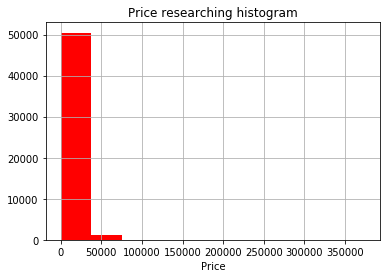

In [35]:
data['price'].hist(color='red')
plt.title("Price researching histogram")
plt.xlabel("Price")
plt.show()

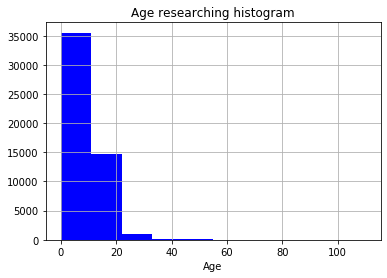

In [36]:
data['age'].hist(color='blue')
plt.title("Age researching histogram")
plt.xlabel("Age")
plt.show()

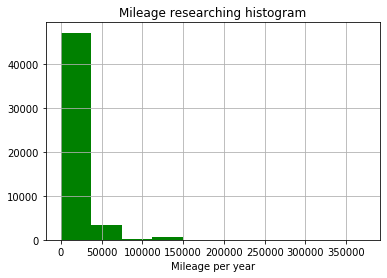

In [37]:
data['mileage_per_year'].hist(color='green')
plt.title("Mileage researching histogram")
plt.xlabel("Mileage per year")
plt.show()

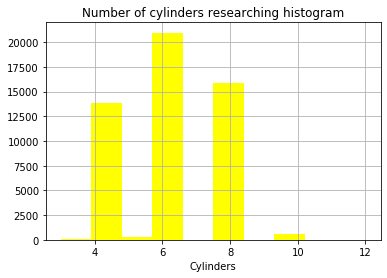

In [38]:
data['cylinders'].hist(color='yellow')
plt.title("Number of cylinders researching histogram")
plt.xlabel("Cylinders")
plt.show()

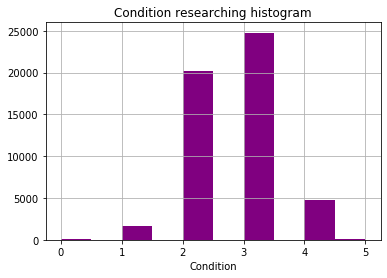

In [39]:
data['condition'].hist(color='purple')
plt.title("Condition researching histogram")
plt.xlabel("Condition")
plt.show()

### Conclusion
After plotting histograms for the parameters: price, age, mileage, cylinders and condition I see that the first 3 histograms are not good enough for researching. Obviously there is outliers which we need to cut off to see the true picture of data in those categories. In price histogram we see separate price which is around 350.000$, it influence on our histogram and doesn't let us see the more details picture. The same is in histograms with age and mileage. 

### To do list:
Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

In [40]:
data['price'].describe()


count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

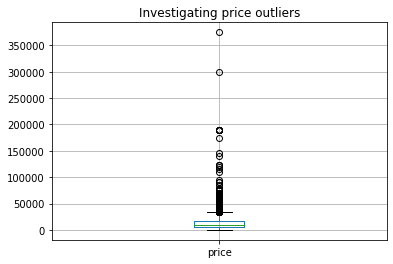

In [41]:
data.boxplot(column='price')
plt.title("Investigating price outliers")
plt.show()

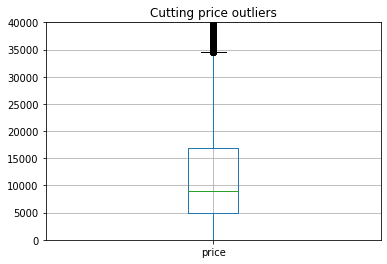

In [42]:
data.boxplot(column='price')
plt.ylim(0, 40000)
plt.title("Cutting price outliers")
plt.show()

In [43]:
data_good = data.query('price <= 35000')

In [44]:
data_good['age'].describe()

count    50111.000000
mean         8.625272
std          5.970140
min          0.000000
25%          5.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

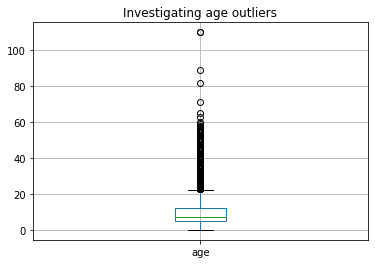

In [45]:
data_good.boxplot(column='age')
plt.title("Investigating age outliers")
plt.show()

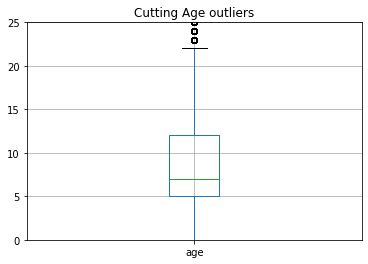

In [46]:
data_good.boxplot(column='age')
plt.ylim(0, 25)
plt.title("Cutting Age outliers")
plt.show()

In [47]:
data_good = data_good.query('age <= 22')

In [48]:
data_good['mileage_per_year'].describe()

count     49077.000000
mean      19111.368821
std       16268.397487
min           0.000000
25%       10680.555556
50%       15285.714286
75%       22142.857143
max      373200.000000
Name: mileage_per_year, dtype: float64

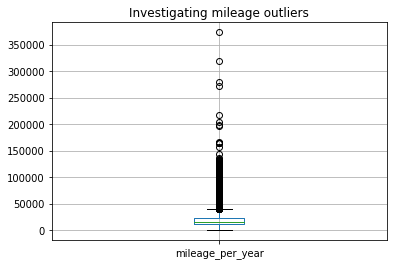

In [49]:
data_good.boxplot('mileage_per_year')
plt.title("Investigating mileage outliers")
plt.show()

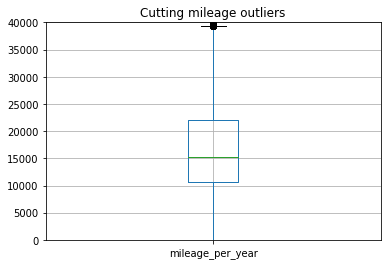

In [50]:
data_good.boxplot(column='mileage_per_year')
plt.ylim(0, 40000)
plt.title("Cutting mileage outliers")
plt.show()

In [51]:
data_good = data_good.query('mileage_per_year <= 39000')

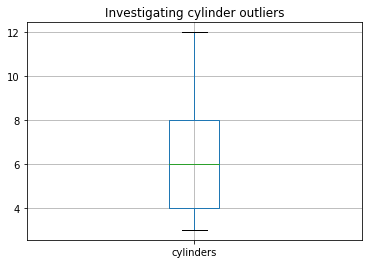

In [52]:
data_good.boxplot(column='cylinders')
plt.title("Investigating cylinder outliers")
plt.show()

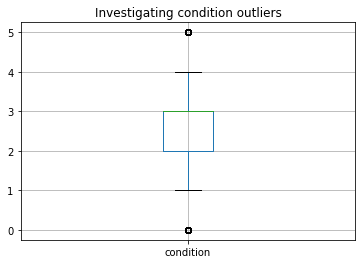

In [53]:
data_good.boxplot(column='condition')
plt.title("Investigating condition outliers")
plt.show()

In [54]:
data_good = data_good.query('0 <= condition <= 5')

### Conclusion
Using boxplotes gave us a very detail picture of our data. As I said previously in 3 columns were outliers which we can see on the boxplotes. So we had outstanding prices from 35000 to 350000 USD, age more then 100 years and mileage over the 350000km. In the column condition also were a small outliers because people rare sell new or salvage cars. I filtered those outliers and now our data is accurate and clean for the further calculations

### To do list:
Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.


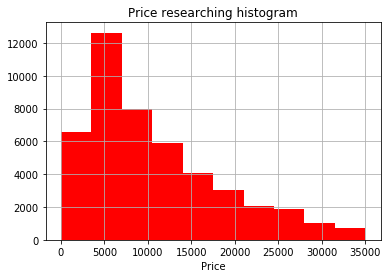

In [55]:
data_good['price'].hist(color='red')
plt.title("Price researching histogram")
plt.xlabel("Price")
plt.show()

#### Now we see normal dispersion. The most cars have a price range 3500-6500 dollars, less with price of 6500-10000, third place is the most cheap cars below 3500, then we see that the more expensive car the less advertising we have.

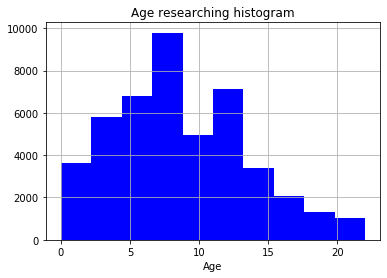

In [56]:
data_good['age'].hist(color='blue')
plt.title("Age researching histogram")
plt.xlabel("Age")
plt.show()

#### The biggest category is cars which 6-7 years old, then 11-12, 4-6, 2-4 and 6-11 years old. The interesting thing that there is a pretty big amount of new cars. And also we see the eldest car is the less ads we have

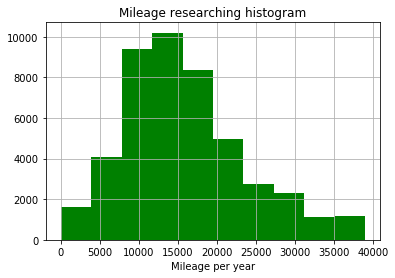

In [57]:
data_good['mileage_per_year'].hist(color='green')
plt.title("Mileage researching histogram")
plt.xlabel("Mileage per year")
plt.show()

#### We have the same picture as on previous 2 histograms: the biggest category is cars with average mileage, less with small and as bigger mileage the less ads on the website

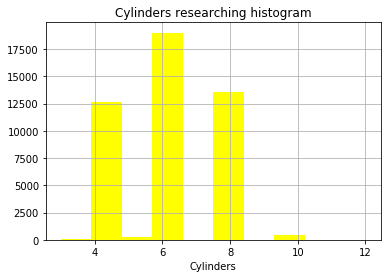

In [58]:
data_good['cylinders'].hist(color='yellow')
plt.title("Cylinders researching histogram")
plt.xlabel("Cylinders")
plt.show()

#### The most common cars with 6, 8 and 4 cylinders, rest are not so popular

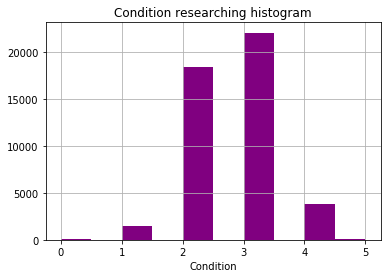

In [59]:
data_good['condition'].hist(color='purple')
plt.title("Condition researching histogram")
plt.xlabel("Condition")
plt.show()

#### The most selling cars are in excellent and good conditions. Rest of ads take a small part of all advertisement.

### To do list:
Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

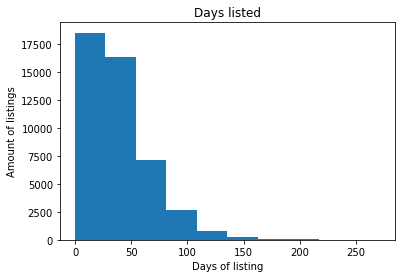

In [60]:
data_good['days_listed'].plot(kind='hist', bins=10, title='Days listed')
plt.xlabel("Days of listing")
plt.ylabel("Amount of listings")
plt.show()

In [61]:
data_good['days_listed'].describe()

count    45911.000000
mean        39.549999
std         28.208028
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

####  The mean and median in the describe method shows us that the most ads were removed in the first month.  After two months the amount of ads reduces. The more time spent the more ads were removed.

### To do list:
Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

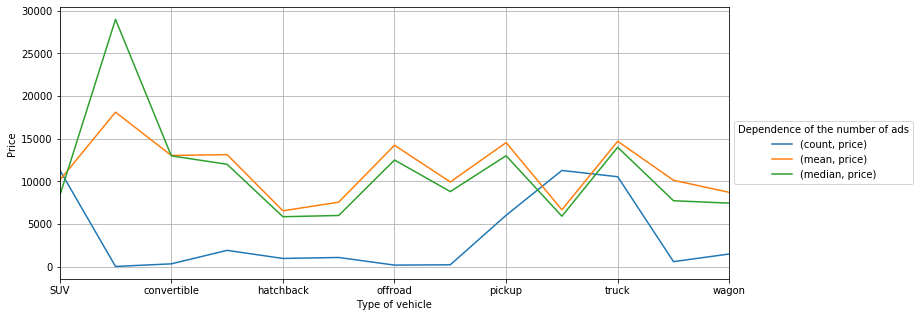

In [62]:
(data_good 
          .pivot_table(index='type', values='price', aggfunc=['count', 'mean','median'])
          .plot(grid=True, figsize=(12, 5))
)
plt.xlabel("Type of vehicle")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1, 0.6), title='Dependence of the number of ads')
plt.show()

#### According to the graph the greatest number of ads have SUV and pickup types of vehicles

### List to do:
What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

In [63]:
data_good['transmission'].value_counts()

automatic    41984
manual        2413
other         1514
Name: transmission, dtype: int64

In [64]:
data_good['paint_color'].value_counts()

white     8587
other     8250
black     6762
silver    5773
grey      4543
blue      4084
red       3953
green     1286
brown     1132
custom    1064
orange     205
yellow     182
purple      90
Name: paint_color, dtype: int64

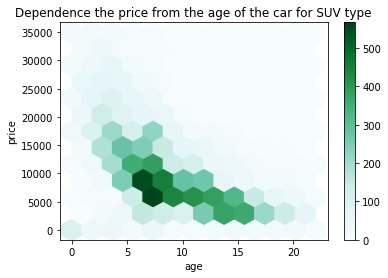

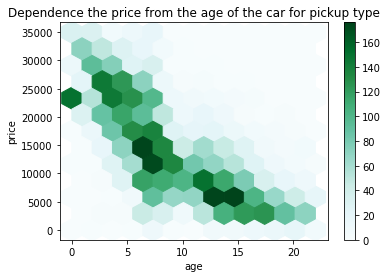

In [65]:
(data_good
          .query('type == "SUV"')
          .plot(x='age', y='price', kind='hexbin', gridsize=12, sharex=False, title='Dependence the price from the age of the car for SUV type')
)
(data_good
          .query('type == "pickup"')
          .plot(x='age', y='price', kind='hexbin', gridsize=12, sharex=False, title='Dependence the price from the age of the car for pickup type')
)
plt.show()

#### Here we see that for the SUV type the most ads for cars 5-7 years old and for the price 5000-10000 USD. Also we see a lot of ads for elder cars and the price almost the same till 15 years old. And as we could prognose the newest cars have the highest price, and eldest ones have the lowest price. For the pickup type picture is little bit different. We can see that the most ads are for cars with the price 10000-15000 USD, and also we see that the popular car age for selling pickups is longer, a lot of ads for cars 12-15 years old. Maybe it connected with the type, since pickup mostly a type car for work, so I assume that it could be in use longer. Also I see bigger dispersion then we had for SUV type, we can see a lot of ads for new cars with a pretty high price like 25000-30000 USD.

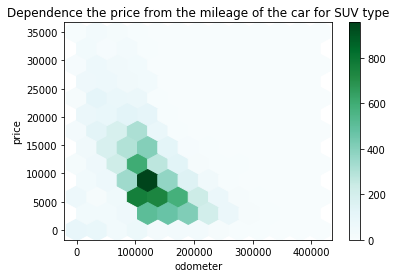

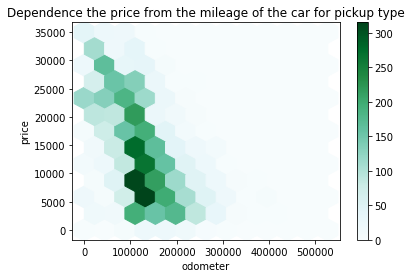

In [66]:
(data_good
          .query('type == "SUV"')
          .plot(x='odometer', y='price', kind='hexbin', gridsize=12, sharex=False, title='Dependence the price from the mileage of the car for SUV type')
)
(data_good
          .query('type == "pickup"')
          .plot(x='odometer', y='price', kind='hexbin', gridsize=12, sharex=False, title='Dependence the price from the mileage of the car for pickup type')
)
plt.show()

#### About how the price dependent on mileage we see the same picture as in previous plots. The pickup type has a bigger dispersion then the SUV type. In SUV type we see that the most of ads are for the cars with a little bit more then 100000km mileage and price for 10000 USD, while the pickups beeing in the same odometer range have more prices diversity from 5000 USD to 15000USD. I think it depends of technical characteristics of pickup cars.

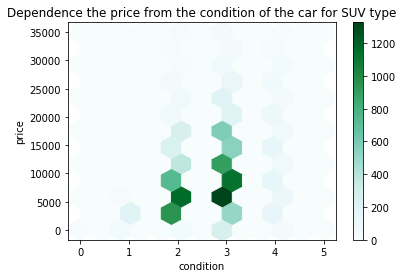

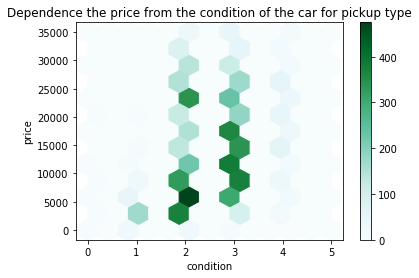

In [67]:
(data_good
          .query('type == "SUV"')
          .plot(x='condition', y='price', kind='hexbin', gridsize=12, sharex=False, title='Dependence the price from the condition of the car for SUV type')
)
(data_good
          .query('type == "pickup"')
          .plot(x='condition', y='price', kind='hexbin', gridsize=12, sharex=False, title='Dependence the price from the condition of the car for pickup type')
)

#### According to condition the most cars of two type are in excellent and good conditions, here we see the identical picture. But the price for pickup type of cars has a bigger range.

In [68]:
matrix = data_good.corr()
matrix

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,week,month,year,age,mileage_per_year
price,1.000000,0.504040,0.195755,0.290305,-0.413896,0.330804,-0.002372,-0.023364,-0.023453,0.023377,-0.501533,0.187354
model_year,0.504040,1.000000,0.274829,-0.141550,-0.551824,-0.018378,-0.002945,-0.042979,-0.042544,0.043914,-0.995267,0.525896
condition,0.195755,0.274829,1.000000,-0.071321,-0.268702,0.000397,0.000188,-0.008791,-0.008307,0.010613,-0.273670,0.048442
cylinders,0.290305,-0.141550,-0.071321,1.000000,0.108030,0.391763,0.004607,0.003484,0.002629,-0.001775,0.141312,-0.045221
odometer,-0.413896,-0.551824,-0.268702,0.108030,1.000000,0.052746,0.006826,0.017299,0.018307,-0.014377,0.550171,0.244270
is_4wd,0.330804,-0.018378,0.000397,0.391763,0.052746,1.000000,0.002742,0.004355,0.003295,-0.000861,0.018285,0.043987
days_listed,-0.002372,-0.002945,0.000188,0.004607,0.006826,0.002742,1.000000,-0.012370,-0.010630,0.011608,0.004073,-0.000106
week,-0.023364,-0.042979,-0.008791,0.003484,0.017299,0.004355,-0.012370,1.000000,0.981867,-0.812337,-0.036059,0.076728
month,-0.023453,-0.042544,-0.008307,0.002629,0.018307,0.003295,-0.010630,0.981867,1.000000,-0.821314,-0.037366,0.079392
year,0.023377,0.043914,0.010613,-0.001775,-0.014377,-0.000861,0.011608,-0.812337,-0.821314,1.000000,0.053379,-0.096002


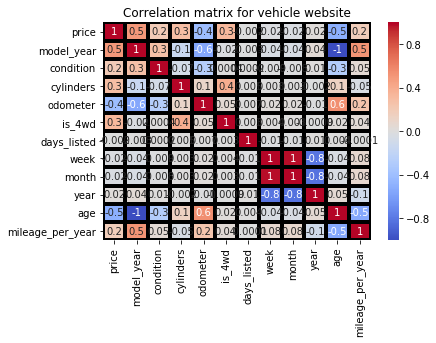

<Figure size 648x360 with 0 Axes>

In [69]:
sn.heatmap(matrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=3, linecolor='black')
plt.title('Correlation matrix for vehicle website')
plt.figure(figsize=(9, 5))
plt.show()

#### Here we see where we have the biggest correlation between such factors as price, mileage, model year and type of the car.

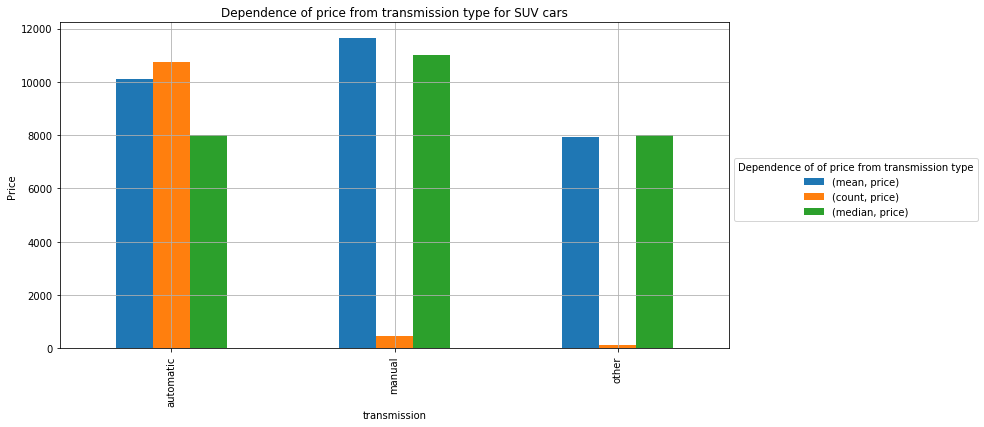

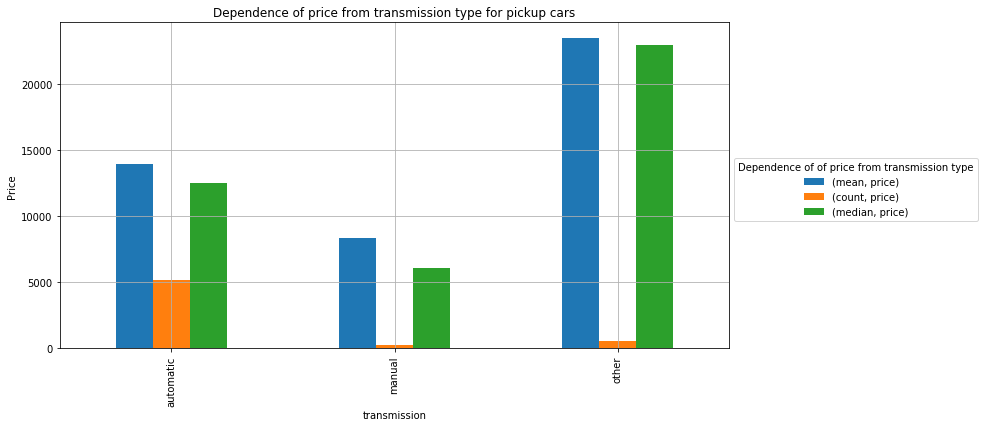

In [70]:
(data_good
          .query('type == "SUV"')
          .pivot_table(index='transmission', values='price', aggfunc=['mean', 'count', 'median'])
          .plot(kind='bar', grid=True, figsize=(12, 6), title='Dependence of price from transmission type for SUV cars')
)
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1, 0.6), title='Dependence of of price from transmission type')
(data_good
          .query('type == "pickup"')
          .pivot_table(index='transmission', values='price', aggfunc=['mean', 'count', 'median'])
          .plot(kind='bar', grid=True, figsize=(12, 6), title='Dependence of price from transmission type for pickup cars')
)
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1, 0.6), title='Dependence of of price from transmission type')
plt.show()

#### From the graphs we see that the most common transmission type is Automatic for both type of cars. SUV cars like as pickup cars with manual or other transmission are very rare, that's why we see such a high prices: for manual transmission for SUV cars and for other type of transmission for pickups

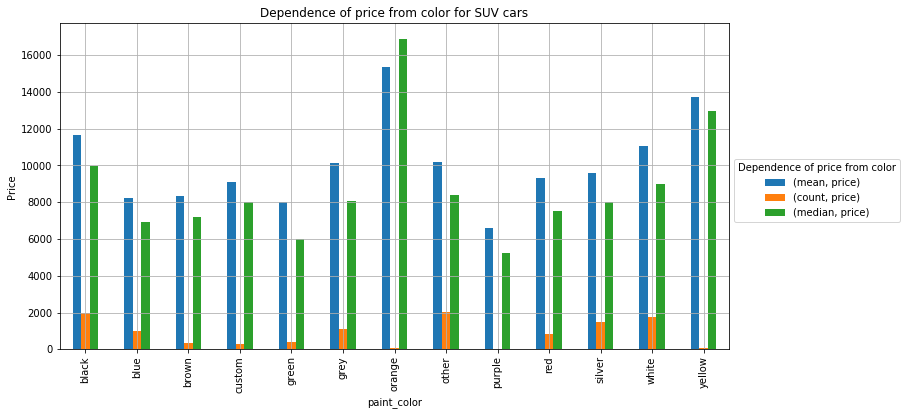

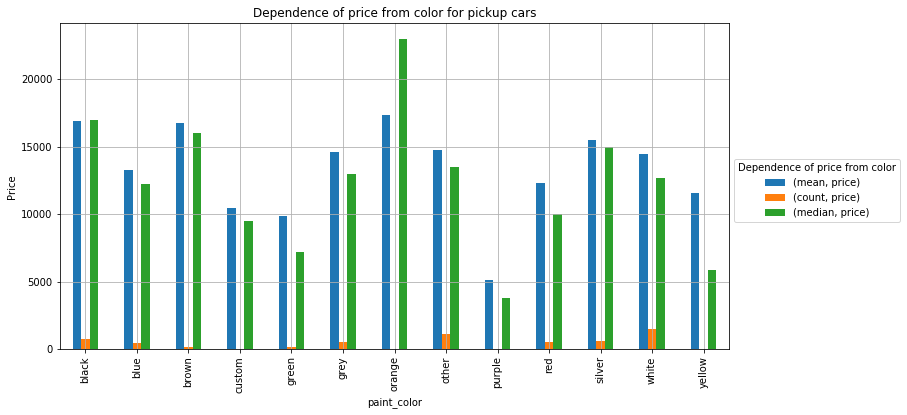

In [71]:
(data_good
          .query('type == "SUV"')
          .pivot_table(index='paint_color', values='price', aggfunc=['mean', 'count', 'median'])
          .plot(kind='bar', grid=True, figsize=(12, 6), title='Dependence of price from color for SUV cars')
)
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1, 0.6), title='Dependence of price from color')
(data_good
          .query('type == "pickup"')
          .pivot_table(index='paint_color', values='price', aggfunc=['mean', 'count', 'median'])
          .plot(kind='bar', grid=True, figsize=(12, 6), title='Dependence of price from color for pickup cars')
)
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1, 0.6), title='Dependence of price from color')
plt.show()

#### The most expensive cars are those which are in orange column, for the SUV cars yellow color also expencive one, for pickups those cars which are in black and brown colors.

## Overall conclusion

 We had the dataset with 51525 rows and 13 columns. The types of data are: float64 - 4 columns, int64 - 2 columns and objext - 7 columns. From the info I saw missing values in columns model_year, cylinders, odometr, paint_color and the most in columns is_4wd. About model_year I may assume that some seller prefered not to indicate the year of car was produced because it could reduce the price the wanted for their car, same thing with odometer values. About amount of cylinders I think that not everyone knows those technical characteristics, especially if sellers are women. About paint_color, so probably some sellers didn't think it is the main car characteristic and prefered to skip this one. And at least, in the column is_4wd were almost 50% of missing values since it is boolean column, so all of those values are equal to 0, or False.
 After looking at the columns with missing values, first 3: model_year, cylinders and odometer had 5%-15% of missing values, so I decided to replace them on median and convert into int type, because there weren't a lot of them. In the column paint_color were a little bit more missing values. But the most of customers first choose car according its technical characteristics, so I decided to replace missing values with 'other' color, it will not damage results of our calculations. In the column 'is_4wd' since it is just information about is this particular car is 4_wd or not I replaced missing values with 0 and converted data type to boolean, so I was able to see the hole picture clear and understandable. And the last thing I did to prepare my data is convertation the date in column 'date_posted', so now we have the correct data type and memory usage reduced.
 Finished data preprocessing, added new columns to our data so I could make the main calculations and analysis more easily since I had the ready values interested me most of all like age of car and mileage per year. These two values are very important for us to see correlation between them and between price of the car. Also made numerical values in condition column since it is more comfortable for researching. The most selling cars are in excellent and good conditions and fewest are new and salvage. It makes sence because people more often sell a cars in good condition cause there is more chances to sell them in a good price. And rare people sell new cars and salvage. First because there is no sence to sell it once your just bought it, this is serious purchase which people wouldn't change so fast. Second because there's no luck to sell a car in a such a bad conditon.
 After plotting histograms for the parameters: price, age, mileage, cylinders and condition I saw that the first 3 histograms are not good enough for researching. Obviously there is outliers which I was needed to cut off to see the true picture of data in those categories. In price histogram I saw separate price which is around 350.000 USD, it influenced on our histogram and didn't let me see the more detail picture. The same was in histograms with age and mileage. 
 Using boxplotes gave me a very detail picture of our data. As I said previously in 3 columns were outliers which we can see on the boxplotes. So we had outstanding prices from 35000 USD to 350000 USD, age more 100 years and mileage over the 350000km. In the column condition also were a small outliers because people rare sell new or salvage cars. I filtered those outliers and prepared the data for calculations.
 After cutting the outliers histograms showed me the next:
   -  The most cars have a price range 3500-6500 dollars, less with price of 6500-10000, third place is the most cheap cars below 3500, then we see that the more expensive car the less advertising we have.
   -  The biggest category is cars which 6-7 years old, then 11-12, 4-6, 2-4 and 6-11 years old. The interesting thing that there is a pretty big amount of new cars. And also we see the eldest car is the less ads we have.
   -  The biggest category is cars with average mileage, less with small and as bigger mileage the less ads on the website.
   -  The most common cars are with 6, 8 and 4 cylinders, rest are not so popular.
   -  The most selling cars are in excellent and good conditions. Rest of ads take a small part of all advertisement.
 After researching the lifetime of advertising I assumed that the most ads were removed in the fisrt month, but still we see a weird peaks after 35 days. Probably sellers want to sell their cars and reduce the price after a month of advertising. After two months the amount of ads reduces. The more time spent the more ads were removed.
 According to the graph the greatest number of ads have SUV and pickup types of vehicles. So it was interesting to investigate how price depends on different factors using those two most common types of cars.
 Here we see that for the SUV type the most ads for cars 5-7 years old and for the price 5000-10000 USD. Also we see a lot of ads for elder cars and the price almost the same till 15 years old. And as we could prognose the newest cars have the highest price, and eldest ones have the lowest price. For the pickup type picture is little bit different. We can see that the most ads are for cars with the price 10000-15000 USD, and also we see that the popular car age for selling pickups is longer, a lot of ads for cars 12-15 years old. Maybe it connected with the type, since pickup mostly a type car for work, so I assume that it could be in use longer. Also I see bigger dispersion then we had for SUV type, we can see a lot of ads for new cars with a pretty high price like 25000-30000 USD.
 About how the price dependent on mileage we see the same picture as in previous plots. The pickup type has a bigger dispersion then the SUV type. In SUV type we see that the most of ads are for the cars with a little bit more then 100000km mileage and price for 10000 USD, while the pickups beeing in the same odometer range have more prices diversity from 5000 USD to 15000USD. I think it depends of technical characteristics of pickup cars.
 According to condition the most cars of two type are in excellent and good conditions, here we see the identical picture. But the price for pickup type of cars has a bigger range.
 From the graphs we see that the most common transmission type is Automatic for both type of cars. SUV cars like as pickup cars with manual or other transmission are very rare, that's why we see such a high prices: for manual transmission for SUV cars and for other type of transmission for pickups. For the SUV type cars I guess we see such situation because most of them are selling with Automatic transmission and since it is a modern type of car, if buyer wants manual transmission he should make a preorder for it, which is raise the price. The other transmission type could be robotic transmission which is expensive by itseld and also influence on the car price.
 The most expensive cars are those which are in orange column, for the SUV cars yellow color also expencive one, for pickups those cars which are in black and brown colors. Orange and yellow colors are not so common so maybe sellers also made a preorder whe bought those cars, and it affected the prices.
 
 

 
 
 